In [4]:
!pip install pyobis

In [ ]:
data.to_csv("~/proj_2025_sdm/contributors/fred/whales.csv", index=False)

In [5]:
import pyobis

def get_obis_data(species, geometry, startdate, enddate):
    occurrences = pyobis.occurrences.search(
        scientificname=species,
        geometry=geometry,
        fields=["id","scientificName", "decimalLatitude", "decimalLongitude", "eventDate"],
        startdate=startdate,
        enddate=enddate
    )
    return occurrences.execute()

#species = "Sardinella aurita"
species = "Larus fuscus"
startdate = "2023-01-01"
enddate = "2025-12-31"
min_lon, min_lat, max_lon, max_lat = -25, -35, 20, 35
geometry_wkt = f'POLYGON(({min_lon} {min_lat}, {max_lon} {min_lat}, {max_lon} {max_lat}, {min_lon} {max_lat}, {min_lon} {min_lat}))'  # WKT for bounding box
data = get_obis_data(species, geometry_wkt, startdate, enddate)
data

2025-08-06 01:34:14 - pyobis.obisutils - INFO - 71552 to be fetched. Estimated time =2.4485182321071624880 seconds
2025-08-06 01:34:14 - pyobis.obisutils - INFO - Fetching: [█████████████.......................................................................................] 10000/71552
2025-08-06 01:34:21 - pyobis.obisutils - INFO - Fetching: [███████████████████████████.........................................................................] 20000/71552
2025-08-06 01:34:24 - pyobis.obisutils - INFO - Fetching: [█████████████████████████████████████████...........................................................] 30000/71552
2025-08-06 01:34:27 - pyobis.obisutils - INFO - Fetching: [███████████████████████████████████████████████████████.............................................] 40000/71552
2025-08-06 01:34:30 - pyobis.obisutils - INFO - Fetching: [█████████████████████████████████████████████████████████████████████...............................] 50000/71552
2025-08-06 01:34:33 

,decimalLatitude,decimalLongitude,eventDate,scientificName,id
0,33.603191,-7.608983,2023-01-17T22:02:47Z,Larus fuscus,0000cb8a-96f9-4965-b904-2e573f895db9
1,33.574802,-7.619838,2023-12-15T00:00:57Z,Larus fuscus,00011b0f-a121-438d-8e2f-57c3a9100886
2,29.821079,-10.113170,2023-03-27T09:01:06Z,Larus fuscus,0002dd07-fe61-4a29-b88f-9ce61748e54f
3,27.094051,-13.419697,2023-01-30T23:00:26Z,Larus fuscus,0004807c-5f0a-448c-817b-5e0943406f31
4,33.209049,-8.485875,2023-02-21T05:03:08Z,Larus fuscus,000596cf-de8d-47f5-99be-8c7aedcdf3be
...,...,...,...,...,...
71547,33.605679,-7.606200,2023-01-04T23:09:29Z,Larus fuscus,fffc10d0-142e-416f-90ea-ea9ce877bfb7
71548,27.937101,-12.324576,2023-08-26T03:01:52Z,Larus fuscus,fffc1e56-fadc-42dc-bef5-3dcf54e78623
71549,27.078747,-13.411431,2023-09-17T07:08:34Z,Larus fuscus,fffcb987-9b76-4846-bfb3-b2c79bd8b003
71550,23.672207,-15.960562,2023-01-14T22:01:45Z,Larus fuscus,fffddacc-cad8-48d0-9476-52f535882e9a


In [11]:
data.to_csv("~/proj_2025_sdm/contributors/fred/whales.csv", index=False)

In [5]:
# data.to_csv("~/proj_2025_sdm/contributors/fred/seabird.csv", index=False)

In [2]:
import pandas as pd
data = pd.read_csv("~/proj_2025_sdm/contributors/fred/whales.csv")

In [3]:
import pandas as pd
data = pd.read_csv("~/proj_2025_sdm/contributors/fred/data/obis_occurrences.csv")

In [4]:
top_species = data["scientificName"].value_counts().head(20)
print(top_species)

scientificName
Larus fuscus                229657
Biota incertae sedis         68231
Chordata                      8847
Animalia                      8292
Ethmalosa fimbriata           6553
Diplodus                      3520
Actinopteri                   2701
Dicentrarchus punctatus       1522
Sardinella maderensis         1468
Mammalia                      1323
Mugil bananensis              1321
Ariidae                       1291
Sparidae                      1237
Arthropoda                     940
Pomatoschistus microps         899
Chelon                         884
Chelon dumerili                843
Mugil                          805
Cylindrotheca closterium       733
Gobius niger                   703
Name: count, dtype: int64


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

species = "Larus fuscus"
min_lon, max_lon, min_lat, max_lat = [-25, 10, -10, 30]

#species = "Megaptera novaeangliae"

data_clean = data[data["scientificName"] == species]

# Drop rows with missing coordinates
data_clean = data_clean.dropna(subset=["decimalLatitude", "decimalLongitude"])

# Extract lat/lon
lats = data_clean["decimalLatitude"]
lons = data_clean["decimalLongitude"]

# Create plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Map features
ax.add_feature(cfeature.LAND, zorder=0)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Set bounding box
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Plot points
ax.scatter(lons, lats, color="red", s=20, transform=ccrs.PlateCarree(), label=species)

# Title and legend
ax.set_title(f"OBIS Occurrences: {species}")
ax.legend(loc="upper right")

plt.show()



NameError: name 'data' is not defined

In [14]:
data_clean

,decimalLatitude,decimalLongitude,eventDate,scientificName,id
0,33.603191,-7.608983,2023-01-17T22:02:47Z,Larus fuscus,0000cb8a-96f9-4965-b904-2e573f895db9
1,33.574802,-7.619838,2023-12-15T00:00:57Z,Larus fuscus,00011b0f-a121-438d-8e2f-57c3a9100886
2,29.821079,-10.113170,2023-03-27T09:01:06Z,Larus fuscus,0002dd07-fe61-4a29-b88f-9ce61748e54f
3,27.094051,-13.419697,2023-01-30T23:00:26Z,Larus fuscus,0004807c-5f0a-448c-817b-5e0943406f31
4,33.209049,-8.485875,2023-02-21T05:03:08Z,Larus fuscus,000596cf-de8d-47f5-99be-8c7aedcdf3be
...,...,...,...,...,...
71547,33.605679,-7.606200,2023-01-04T23:09:29Z,Larus fuscus,fffc10d0-142e-416f-90ea-ea9ce877bfb7
71548,27.937101,-12.324576,2023-08-26T03:01:52Z,Larus fuscus,fffc1e56-fadc-42dc-bef5-3dcf54e78623
71549,27.078747,-13.411431,2023-09-17T07:08:34Z,Larus fuscus,fffcb987-9b76-4846-bfb3-b2c79bd8b003
71550,23.672207,-15.960562,2023-01-14T22:01:45Z,Larus fuscus,fffddacc-cad8-48d0-9476-52f535882e9a


In [13]:
top_species = data["scientificName"].value_counts().head(20)
print(top_species)

scientificName
Larus fuscus    71552
Name: count, dtype: int64


In [10]:
occurrences_by_year = (
    data_clean
    .dropna(subset=["eventDate"])  # remove missing dates
    .assign(year=lambda df: df["eventDate"].dt.year)
    .groupby("year")
    .size()
    .sort_index()
)

#print(occurrences_by_year)

AttributeError: Can only use .dt accessor with datetimelike values

In [15]:
# Step 1: Make a copy and parse dates safely
ethmalosa_data = data[data["scientificName"] == "Ethmalosa fimbriata"].copy()
ethmalosa_data["eventDate"] = pd.to_datetime(ethmalosa_data["eventDate"], errors="coerce")

IndexError: index 0 is out of bounds for axis 0 with size 0

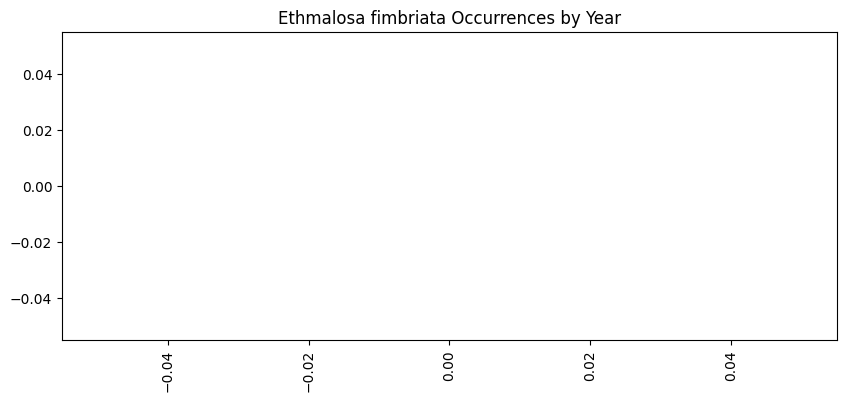

In [16]:
occurrences_by_year = (
    ethmalosa_data
    .dropna(subset=["eventDate"])  # filter out rows with NaT
    .assign(year=lambda df: df["eventDate"].dt.year)
    .groupby("year")
    .size()
    .sort_index()
)

import matplotlib.pyplot as plt

occurrences_by_year.plot(kind="bar", figsize=(10, 4), title="Ethmalosa fimbriata Occurrences by Year")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()



In [ ]:
ethmalosa_data

In [ ]:
# Step 1: Ensure eventDate is datetime
data["eventDate"] = pd.to_datetime(data["eventDate"], errors="coerce")

# Step 2: Drop rows with missing dates or species
#data_clean = data.dropna(subset=["eventDate", "scientificName"])

data_clean = data

# Step 3: Extract year column
data_clean["year"] = data_clean["eventDate"].dt.year

# Step 4: Create species-by-year table
species_year_table = (
    data_clean
    .groupby(["scientificName", "year"])
    .size()
    .unstack(fill_value=0)
    .sort_index()  # Sort by species
)

# Display
import pandas as pd
#pd.set_option("display.max_rows", 20)  # or None to show all
species_year_table


In [ ]:
data_clean.scientificName.unique()

In [ ]:
data_clean.groupby(["scientificName", "year"]).size()

In [6]:
import pandas as pd
import calendar

# Step 1: Ensure datetime
data["eventDate"] = pd.to_datetime(data["eventDate"], errors="coerce")

# Step 2: Drop rows with missing species or date
data_clean = data.dropna(subset=["eventDate", "scientificName"]).copy()

# Step 3: Extract year and month
data_clean["year"] = data_clean["eventDate"].dt.year
data_clean["month"] = data_clean["eventDate"].dt.month

# Step 4: Count occurrences per species per year+month
monthly_counts = (
    data_clean
    .groupby(["scientificName", "year", "month"])
    .size()
    .reset_index(name="count")
)

# Step 5: Average count across years → monthly average per species
monthly_avg = (
    monthly_counts
    .groupby(["scientificName", "month"])["count"]
    .mean()
    .unstack(fill_value=0)  # Rows = species, columns = month
)

monthly_avg.columns = [calendar.month_abbr[m] for m in monthly_avg.columns]
monthly_avg = monthly_avg.round(1)  # Round for clarity

# Show the first few rows
monthly_avg.head()


,Jan,Feb,Mar,Apr,Aug,Sep,Oct,Nov,Dec
scientificName,,,,,,,,,
Larus fuscus,16948.0,14467.0,12321.0,2323.0,809.0,3371.0,3720.0,5925.0,11667.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar

# Ensure datetime format
data["eventDate"] = pd.to_datetime(data["eventDate"], errors="coerce")

# Filter for the species and year 2023
species = "Larus fuscus"
data_clean = data[
    (data["scientificName"] == species) &
    (data["eventDate"].dt.year == 2022)
].dropna(subset=["decimalLatitude", "decimalLongitude"]).copy()

# Create 12 subplots (3 rows × 4 columns)
fig, axes = plt.subplots(3, 4, figsize=(20, 12),
                         subplot_kw={"projection": ccrs.PlateCarree()})
axes = axes.flatten()

# Plot each month
for month in range(1, 13):
    ax = axes[month - 1]
    month_data = data_clean[data_clean["eventDate"].dt.month == month]

    # Base map
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(calendar.month_name[month])

    # Plot points
    ax.scatter(
        month_data["decimalLongitude"],
        month_data["decimalLatitude"],
        color="red", s=10, transform=ccrs.PlateCarree()
    )

# Clean layout
plt.suptitle(f"Monthly OBIS Occurrences for {species} in 2023", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


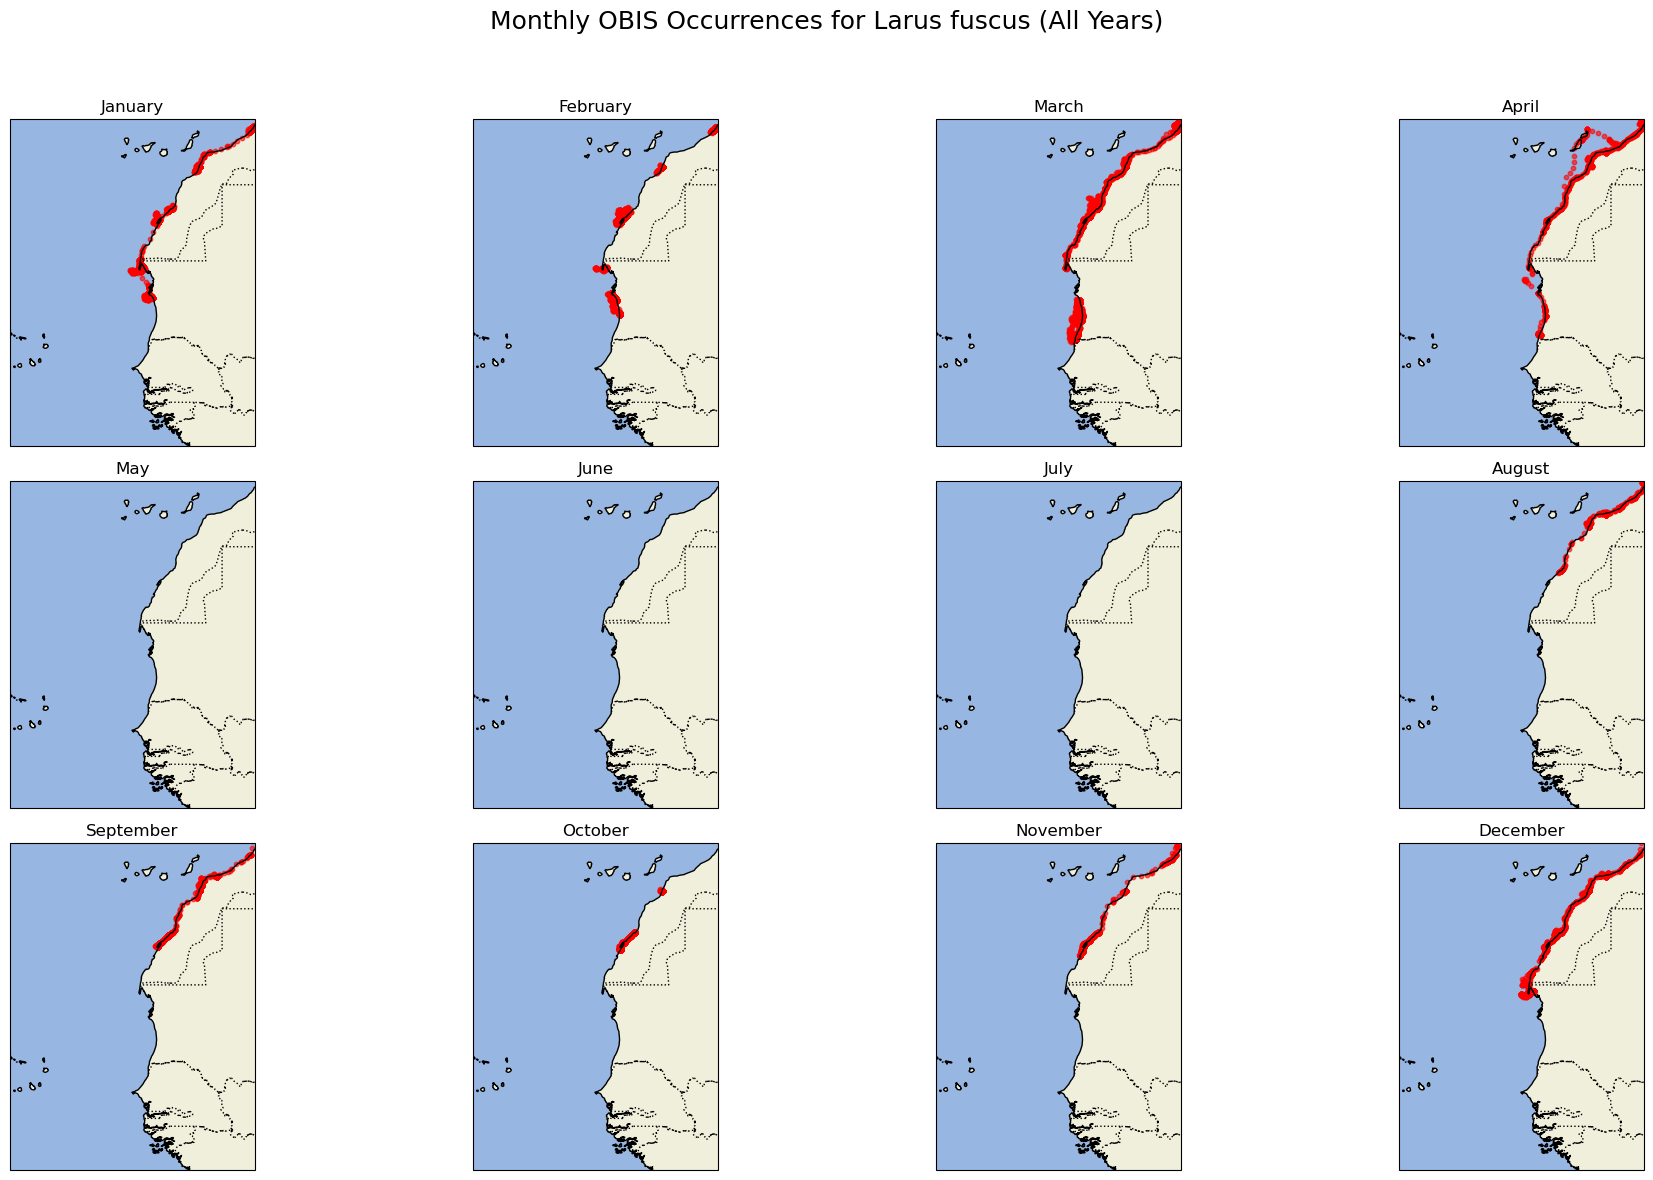

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar

# Make sure eventDate is datetime
data["eventDate"] = pd.to_datetime(data["eventDate"], errors="coerce")

min_lon, min_lat, max_lon, max_lat = [-25, 10, -10, 30]


# Filter for species
species = "Larus fuscus"
data_clean = (
    data[data["scientificName"] == species]
    .dropna(subset=["decimalLatitude", "decimalLongitude", "eventDate"])
    .copy()
)

# Extract month
data_clean["month"] = data_clean["eventDate"].dt.month

# Plot setup: 3 rows × 4 columns
fig, axes = plt.subplots(3, 4, figsize=(20, 12),
                         subplot_kw={"projection": ccrs.PlateCarree()})
axes = axes.flatten()

# Loop over months
for month in range(1, 13):
    ax = axes[month - 1]
    month_data = data_clean[data_clean["month"] == month]

    # Set extent for your region
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

    # Base map
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(calendar.month_name[month])

    # Plot points
    ax.scatter(
        month_data["decimalLongitude"],
        month_data["decimalLatitude"],
        color="red", s=10, alpha=0.6, transform=ccrs.PlateCarree()
    )

# Final layout
plt.suptitle(f"Monthly OBIS Occurrences for {species} (All Years)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [5]:
import sdm

#bbox = [-25, -35, 20, 35]
bbox = [-25, 10, -10, 30] # min_lon, min_lat, max_lon, max_lat
sdm.simple_bbox(bbox, projection='Robinson')

ModuleNotFoundError: No module named 'sdm'

In [6]:
pip install sdm

  Preparing metadata (setup.py) ... done
errorg wheel for sdm (setup.py) ... 
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      In file included from src/address_space.h:8,
                       from src/address_space.c:8:
      src/scanner_opencl.h:10:10: fatal error: CL/cl.h: No such file or directory
         10 | #include <CL/cl.h>
            |          ^~~~~~~~~
      compilation terminated.
      error: command '/usr/bin/gcc' failed with exit code 1
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for sdm
  Running setup.py clean for sdm
Failed to build sdm
ERROR: Failed to build installable wheels for some pyproject.toml based projects (sdm)
Note: you may need to restart the kernel to use updated packages.
